In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import plot_analysis as pa
import os

In [2]:
DATA_PATH = r'C:\Users\matte\Data Science\Tesi\experiment'

### Turing Analysis

We look for statistic of each experiment. 
The core point is to underline a path of reason, is more likely to select a journalist, the a.i. or their selection is better near 50%

In [3]:
turing = pd.read_csv(os.path.join(DATA_PATH,'turing_results.csv'))

In [4]:
turing.head(0)

,pool,player_name,option_1,option_2,model_prediction,response_1,response_2,response_3,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14


In [5]:
turing = turing[turing['pool'].notna()]
turing = turing.loc[:, ~turing.columns.str.contains('^Unnamed')]

In [6]:
turing

,pool,player_name,option_1,option_2,model_prediction,response_1,response_2,response_3
0,pool_1,"IMMOBILE (SS Lazio, Attaccante)",5.0,5.5,5.5,5.0,5.5,5.0
1,pool_1,"CAICEDO (SS Lazio, Attaccante)",6.0,6.5,6.0,6.5,6.5,6.0
2,pool_1,"LUIS ALBERTO (SS Lazio, Centrocampista)",5.5,5.0,5.5,5.5,5.5,5.0
3,pool_1,"WALLACE (SS Lazio, Difensore)",3.0,4.5,4.5,4.5,4.5,3.0
4,pool_1,"GOMEZ A (Atalanta Bergamasca Calcio, Attaccante)",7.0,7.5,7.0,7.0,7.5,7.0
...,...,...,...,...,...,...,...,...
63,pool_4,"CAPUANO (Frosinone Calcio, Difensore)",5.0,5.5,5.5,5.0,5.5,5.5
64,pool_4,"KOLAROV (AS Roma, Difensore)",6.0,5.5,6.0,6.0,5.5,5.5
65,pool_4,"MANOLAS (AS Roma, Difensore)",6.5,6.0,6.0,6.0,6.0,6.0
66,pool_4,"DZEKO (AS Roma, Attaccante)",8.0,7.5,7.5,8.0,7.5,8.0


In [7]:
def percentage(part, whole):
    return round(100 * float(part)/float(whole), 1)

def compute_values_for_total_bar_chart(turing):
    '''
    Plot a pie chart, from the turing experiment dataset in which there is the difference between AI recognized and AI not recognized
    '''
    # Data to plot
    
    labels = ['Artificial Journalist', 'Real Journalist']
    colors = ['tab:orange','tab:blue']
    total_exp = 0
    same_as_model = 0
    different_from_model = 0
    for el in turing.values:
        if(float(el[4]) == float(el[5])):
            total_exp += 1
            same_as_model+=1
        else:
            total_exp += 1
            different_from_model += 1
        if(float(el[4]) == float(el[6])):
            total_exp += 1
            same_as_model+=1
        else:
            total_exp += 1
            different_from_model += 1  
        if(float(el[4]) == float(el[7])):
            total_exp += 1
            same_as_model+=1
        else:
            total_exp += 1
            different_from_model += 1
    sizes = [same_as_model, different_from_model]
    sizes = [percentage(same_as_model, same_as_model+different_from_model), percentage(different_from_model, same_as_model+different_from_model)]
    labels[0] = labels[0] + '\n' +str(sizes[0])
    labels[1] = labels[1] + '\n' +str(sizes[1])
    
    x = np.arange(len(labels))  # the label locations
    width = 0.30  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(6,6))
    plt.bar(x, sizes, color = colors, width=width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Recognition (%)', fontsize=20, labelpad=15)
    #ax.set_title('Recognition of Artificial Intelligence Ratings')
    ax.set_xticks(x)
    ax.set_yticklabels([0,10,20,30,40,50], fontsize=15)
    ax.set_xticklabels(labels, fontsize=20)
    
    plt.tight_layout()
    
    plt.savefig('img/recognition_total.pdf')

    plt.show()

Plot a pie chart, this allow us to understand in which distribution the partecipants were able to recognize the AI ratings

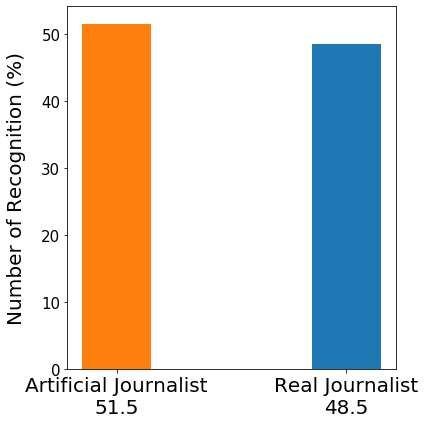

In [8]:
compute_values_for_total_bar_chart(turing)

In [9]:
def return_metrics_for_role(turing):
    '''
    function, that extract from the turing experiment dataset result, metrics for each role.
    Return a dictionary structured as subdictonary 
    {
    total : ...
    A : ...
    C : ...
    D : ...
    P : ...
    }
    '''
    total_exp = 0
    same_as_model = 0
    different_from_model = 0
    total_exp_att = 0
    same_as_model_att = 0
    different_from_model_att = 0
    total_exp_mid = 0
    same_as_model_mid = 0
    different_from_model_mid = 0
    total_exp_def = 0
    same_as_model_def = 0
    different_from_model_def  = 0
    total_exp_gk = 0
    same_as_model_gk = 0
    different_from_model_gk = 0
    
    labels = ['Artificial Journalist', 'Real Journalist']
    colors = ['blue','orange']
    
    for el in turing.values:
        last = len(el[1].split())
        role = el[1].split()[last -1].replace(')', '')
        if(float(el[4]) == float(el[5])):
            if(role == 'Attaccante'):
                total_exp += 1
                same_as_model+=1
                total_exp_att += 1
                same_as_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                same_as_model += 1
                total_exp_mid += 1
                same_as_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                same_as_model += 1
                total_exp_def += 1
                same_as_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                same_as_model += 1
                total_exp_gk += 1
                same_as_model_gk += 1        
        else:
            if(role == 'Attaccante'):
                total_exp += 1
                different_from_model+=1
                total_exp_att += 1
                different_from_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                different_from_model += 1
                total_exp_mid += 1
                different_from_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                different_from_model += 1
                total_exp_def += 1
                different_from_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                different_from_model += 1
                total_exp_gk += 1
                different_from_model_gk += 1  
        if(float(el[4]) == float(el[6])):
            if(role == 'Attaccante'):
                total_exp += 1
                same_as_model+=1
                total_exp_att += 1
                same_as_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                same_as_model += 1
                total_exp_mid += 1
                same_as_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                same_as_model += 1
                total_exp_def += 1
                same_as_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                same_as_model += 1
                total_exp_gk += 1
                same_as_model_gk += 1        
        else:
            if(role == 'Attaccante'):
                total_exp += 1
                different_from_model+=1
                total_exp_att += 1
                different_from_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                different_from_model += 1
                total_exp_mid += 1
                different_from_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                different_from_model += 1
                total_exp_def += 1
                different_from_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                different_from_model += 1
                total_exp_gk += 1
                different_from_model_gk += 1   
        if(float(el[4]) == float(el[7])):
            if(role == 'Attaccante'):
                total_exp += 1
                same_as_model+=1
                total_exp_att += 1
                same_as_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                same_as_model += 1
                total_exp_mid += 1
                same_as_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                same_as_model += 1
                total_exp_def += 1
                same_as_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                same_as_model += 1
                total_exp_gk += 1
                same_as_model_gk += 1        
        else:
            if(role == 'Attaccante'):
                total_exp += 1
                different_from_model+=1
                total_exp_att += 1
                different_from_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                different_from_model += 1
                total_exp_mid += 1
                different_from_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                different_from_model += 1
                total_exp_def += 1
                different_from_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                different_from_model += 1
                total_exp_gk += 1
                different_from_model_gk += 1                      
    results_per_role = {}
    results_per_role['total'] = {}
    results_per_role['total']['total_number'] = total_exp
    results_per_role['total']['AI find'] = same_as_model
    results_per_role['total']['AI not find'] = different_from_model
    results_per_role['total']['sizes'] = [same_as_model, different_from_model]
    results_per_role['total']['labels'] = [labels[0] + '\n' +str(results_per_role['total']['sizes'][0]), labels[1] + '\n' +str(results_per_role['total']['sizes'][1])]
    
    results_per_role['A'] = {}
    results_per_role['A']['total_number'] = total_exp_att
    results_per_role['A']['AI find'] = same_as_model_att
    results_per_role['A']['AI not find'] = different_from_model_att
    results_per_role['A']['sizes'] = [same_as_model_att, different_from_model_att]
    results_per_role['A']['labels'] = [labels[0] + '\n' +str(results_per_role['A']['sizes'][0]), labels[1] + '\n' +str(results_per_role['A']['sizes'][1])]
    
    results_per_role['C'] = {}
    results_per_role['C']['total_number'] = total_exp_mid
    results_per_role['C']['AI find'] = same_as_model_mid
    results_per_role['C']['AI not find'] = different_from_model_mid
    results_per_role['C']['sizes'] = [same_as_model_mid, different_from_model_mid]
    results_per_role['C']['labels'] = [labels[0] + '\n' +str(results_per_role['C']['sizes'][0]), labels[1] + '\n' +str(results_per_role['C']['sizes'][1])]
    
    results_per_role['D'] = {}
    results_per_role['D']['total_number'] = total_exp_def
    results_per_role['D']['AI find'] = same_as_model_def
    results_per_role['D']['AI not find'] = different_from_model_def
    results_per_role['D']['sizes'] = [same_as_model_def, different_from_model_def]
    results_per_role['D']['labels'] = [labels[0] + '\n' +str(results_per_role['D']['sizes'][0]), labels[1] + '\n' +str(results_per_role['D']['sizes'][1])]
    
    results_per_role['P'] = {}
    results_per_role['P']['total_number'] = total_exp_gk
    results_per_role['P']['AI find'] = same_as_model_gk
    results_per_role['P']['AI not find'] = different_from_model_gk
    results_per_role['P']['sizes'] = [same_as_model_gk, different_from_model_gk]
    results_per_role['P']['labels'] = [labels[0] + '\n' +str(results_per_role['P']['sizes'][0]), labels[1] + '\n' +str(results_per_role['P']['sizes'][1])]
    
    
    results_per_role['All'] = {}
    results_per_role['All']['total_number'] = total_exp_att + total_exp_mid + total_exp_def + total_exp_gk
    results_per_role['All']['AI find'] = same_as_model_att + same_as_model_mid + same_as_model_def + same_as_model_gk
    results_per_role['All']['AI not find'] = different_from_model_att + different_from_model_mid + different_from_model_def + different_from_model_gk
    results_per_role['All']['sizes'] = [same_as_model_att + same_as_model_mid + same_as_model_def + same_as_model_gk, different_from_model_att + different_from_model_mid + different_from_model_def + different_from_model_gk]
    results_per_role['All']['labels'] = [labels[0] + '\n' +str(results_per_role['All']['sizes'][0]), labels[1] + '\n' +str(results_per_role['All']['sizes'][1])]
    return results_per_role    

In [10]:
def percentage(part, whole):
    return round(100 * float(part)/float(whole), 1)

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)
    recon = 0
    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        if(recon == 1):
            axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        else:
            axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color, hatch='//'))
            
        cum_size += row_data
        recon += 1

    if category_labels:
        plt.xticks(ind, category_labels, fontsize=15, rotation=20, ha='right')

    if y_label:
        plt.ylabel(y_label, fontsize=15)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                if(h != 0):
                    plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center", fontsize=15, weight='bold')

def bar_chart_per_role(res):
    '''
    Function to plot results of role computation in order to understand which role is better distingushable between 
    real one and fake one
    '''
    labels = ['All Roles', '', 'Forwards', 'Midfielders', 'Defenders', 'Goalkeepers']
    role_ai_id = [res['All']['AI find'], 0, res['A']['AI find'], res['C']['AI find'], res['D']['AI find'], res['P']['AI find']]
    role_ai_not_id = [res['All']['AI not find'], 0 ,res['A']['AI not find'], res['C']['AI not find'], res['D']['AI not find'], res['P']['AI not find']]
    
    roles_ai_id = [percentage(role_ai_id[0], role_ai_id[0] + role_ai_not_id[0]), 0 ,percentage(role_ai_id[2], role_ai_id[2] + role_ai_not_id[2]),
                  percentage(role_ai_id[3], role_ai_id[3] + role_ai_not_id[3]), percentage(role_ai_id[4], role_ai_id[4] + role_ai_not_id[4]),
                  percentage(role_ai_id[5], role_ai_id[5] + role_ai_not_id[5])]
    roles_ai_not_id = [percentage(role_ai_not_id[0], role_ai_id[0] + role_ai_not_id[0]), 0 ,percentage(role_ai_not_id[2], role_ai_id[2] + role_ai_not_id[2]),
                      percentage(role_ai_not_id[3], role_ai_id[3] + role_ai_not_id[3]), percentage(role_ai_not_id[4], role_ai_id[4] + role_ai_not_id[4]),
                      percentage(role_ai_not_id[5], role_ai_id[5] + role_ai_not_id[5])]
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    ############################
    #STRUCTURED AS CLOSED BAR CHART
    ################################
    '''
    fig, ax = plt.subplots(figsize=(9,6))
    rects1 = ax.bar(x - width/2, roles_ai_id, width, label='Artificial Journalist', color='#D51B1B', hatch='//')
    rects2 = ax.bar(x + width/2, roles_ai_not_id, width, label='Real Journalist', color=(0, 0, 0, 0.6))
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Recognition (%)', fontsize=25, labelpad=15)
    #ax.set_title('Votes by Role by Artifical Rates Recognition')
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=16)
    ax.set_yticklabels([0,20,40,60,80,100], fontsize=15)
    ax.legend(fontsize=15)
    #ax.set_xlabel('Roles', fontsize=25)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if(height != 0):
                ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',fontsize=14)


    autolabel(rects1)
    autolabel(rects2)

    plt.ylim(0,100)
    '''
    
    ############################
    #STRUCTURED AS Stacked Bar chart
    ################################
    '''
    data = [
    [percentage(role_ai_id[0], role_ai_id[0] + role_ai_not_id[0]), 0 ,percentage(role_ai_id[2], role_ai_id[2] + role_ai_not_id[2]),
                  percentage(role_ai_id[3], role_ai_id[3] + role_ai_not_id[3]), percentage(role_ai_id[4], role_ai_id[4] + role_ai_not_id[4]),
                  percentage(role_ai_id[5], role_ai_id[5] + role_ai_not_id[5])],
    [percentage(role_ai_not_id[0], role_ai_id[0] + role_ai_not_id[0]), 0 ,percentage(role_ai_not_id[2], role_ai_id[2] + role_ai_not_id[2]),
                      percentage(role_ai_not_id[3], role_ai_id[3] + role_ai_not_id[3]), percentage(role_ai_not_id[4], role_ai_id[4] + role_ai_not_id[4]),
                      percentage(role_ai_not_id[5], role_ai_id[5] + role_ai_not_id[5])]]
    
    series_labels = ['Artificial Journalist', 'Real Journalist']
    category_labels = ['Rating Only', 'Ratings + Explanation', 'Explanation Only']
    
    plt.figure(figsize=(9,6))
    
    plot_stacked_bar(
        data, 
        series_labels, 
        category_labels=labels, 
        show_values=True, 
        value_format="{:.1f}",
        colors=['#D51B1B', (0, 0, 0, 0.6)],
        y_label="Number of Recognition (%)"
    )
    plt.axhline(y=50,color='red', label='50%')
    #plt.title('First Scenario, Human Evaluation Knowing only AI Prediction')
    #plt.xlabel('Scenario', fontsize=20)
    plt.yticks([0,20,40,60,80,100], fontsize=15)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fontsize=13)
    plt.grid(False)  
    '''
    ############################
    #STRUCTURED AS Single barchart
    ################################
    
    fig, ax = plt.subplots(figsize=(9,6))
    rects1 = ax.bar(x[0], roles_ai_id[0], width, label='Artificial Journalist', color='#D51B1B', hatch='//')
    rects2 = ax.bar(x[1:], roles_ai_id[1:], width, label='Artificial Journalist', color='#D51B1B')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Artificial rating detected (%)', fontsize=25, labelpad=15)
    #ax.set_title('Votes by Role by Artifical Rates Recognition')
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=16)
    #ax.set_yticklabels([0,20,40,60,80,100], fontsize=15)
    ax.xaxis.get_major_ticks()[1].set_visible(False)
    #ax.set_xlabel('Roles', fontsize=25)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if(height != 0):
                ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',fontsize=14)

    autolabel(rects1)
    autolabel(rects2)
    plt.ylim(0,max(roles_ai_id) + 10)
    
    plt.axvline(x=x[1], linestyle='--', color='black', lw=4)
    
    plt.tight_layout()
    plt.savefig('img/recognition_role.pdf')

    plt.show()

In [11]:
azz = return_metrics_for_role(turing)

In [12]:
azz

{'total': {'total_number': 204,
  'AI find': 105,
  'AI not find': 99,
  'sizes': [105, 99],
  'labels': ['Artificial Journalist\n105', 'Real Journalist\n99']},
 'A': {'total_number': 57,
  'AI find': 31,
  'AI not find': 26,
  'sizes': [31, 26],
  'labels': ['Artificial Journalist\n31', 'Real Journalist\n26']},
 'C': {'total_number': 54,
  'AI find': 25,
  'AI not find': 29,
  'sizes': [25, 29],
  'labels': ['Artificial Journalist\n25', 'Real Journalist\n29']},
 'D': {'total_number': 84,
  'AI find': 46,
  'AI not find': 38,
  'sizes': [46, 38],
  'labels': ['Artificial Journalist\n46', 'Real Journalist\n38']},
 'P': {'total_number': 9,
  'AI find': 3,
  'AI not find': 6,
  'sizes': [3, 6],
  'labels': ['Artificial Journalist\n3', 'Real Journalist\n6']},
 'All': {'total_number': 204,
  'AI find': 105,
  'AI not find': 99,
  'sizes': [105, 99],
  'labels': ['Artificial Journalist\n105', 'Real Journalist\n99']}}

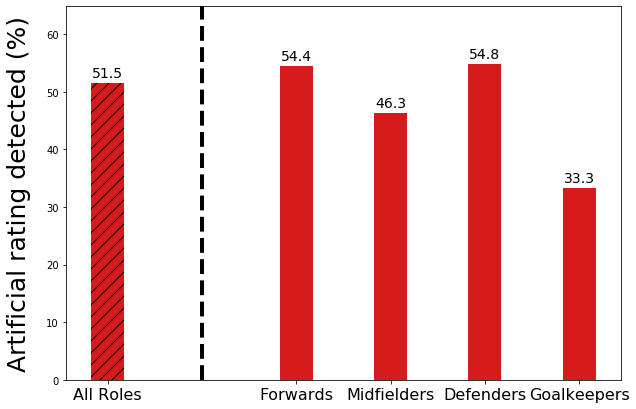

In [13]:
bar_chart_per_role(azz)

### Treatment Analysis

We look for similarity to A.I. based on scenario we give to human evaluator

In [14]:
treatment = pd.read_csv(os.path.join(DATA_PATH, 'treatment_results.csv'), encoding='latin-1')

In [15]:
treatment

,pool,player_name,scenarios,res_1,res_2,res_3,prediction,journalist,match
0,pool_1,"PAROLO (SS Lazio, Centrocampista)",Il voto assegnato al giocatore è 6.5 perchè: N...,6.5,7.0,6.5,6.5,6.5,1
1,pool_1,"LUIS ALBERTO (SS Lazio, Centrocampista)",Il voto assegnato al giocatore è 5.5. Qual è i...,5.0,5.5,5.5,5.5,5.0,1
2,pool_1,"STRAKOSHA (SS Lazio, Portiere)",Informazioni Utili: Numero dei goal sofferti d...,6.0,6.0,4,6.5,6.0,1
3,pool_1,"BASTOS (SS Lazio, Difensore)",Il voto assegnato al giocatore è 5.0 perchè: N...,5.5,5.5,5.5,5.0,5.0,1
4,pool_1,"IMMOBILE (SS Lazio, Attaccante)",Il voto assegnato al giocatore è 5.5. Qual è i...,6.0,6.5,5.5,5.5,5.0,1
...,...,...,...,...,...,...,...,...,...
95,pool_4,"DE ROSSI (AS Roma, Centrocampista)",Il voto assegnato al giocatore è 6.0. Qual è i...,6.0,6.0,6,6.0,6.0,10
96,pool_4,"PELLEGRINI LO (AS Roma, Centrocampista)",Informazioni Utili: Numero di goal fatti 1 (me...,6.5,6.5,6,7.0,7.0,10
97,pool_4,"OLSEN (AS Roma, Portiere)",Il voto assegnato al giocatore è 6.5. Qual è i...,5.5,5.5,5.5,6.5,5.5,10
98,pool_4,"KOLAROV (AS Roma, Difensore)",Il voto assegnato al giocatore è 6.0 perchè: D...,5.5,5.5,5,6.0,5.5,10


In [16]:
def convert_dots(treatment):
    '''
    This function convert all, into .
    '''
    res1 = []
    res2 = []
    res3 = []
    for el in treatment.values:
        if(',' in str(el[3])):
            res1.append(float(el[3].replace(',', '.')))
        else:
            res1.append(float(el[3]))
        if(',' in str(el[4])):
            res2.append(float(el[4].replace(',', '.')))
        else:
            res2.append(float(el[4]))
        if(',' in str(el[5])):
            res3.append(float(el[5].replace(',', '.')))
        else:
            res3.append(float(el[5]))
    treatment['res_1'] = res1
    treatment['res_2'] = res2
    treatment['res_3'] = res3
    
    return treatment

In [17]:
treatment = convert_dots(treatment)

In [18]:
def treatment_statistics(tratment):
    '''
    Plot a pie chart, from the turing experiment dataset in which there is the difference between AI recognized and AI not recognized
    '''
    # Data to plot
    labels = ['AI identified', 'AI not identfied']
    colors = ['gold','lightskyblue']
    total_exp = 0
    same_as_model = 0
    different_from_model = 0
    for el in treatment.values:
        if(el[0] != 'pool_4'):
            if(float(el[6]) == float(el[3])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1
            if(float(el[6]) == float(el[4])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1  
            if(float(el[6]) == float(el[5])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1
        else:
            if(float(el[6]) == float(el[3])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1
            if(float(el[6]) == float(el[4])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1
    sizes = [same_as_model, different_from_model]
    labels[0] = labels[0] + '\n' +str(sizes[0])
    labels[1] = labels[1] + '\n' +str(sizes[1])
    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

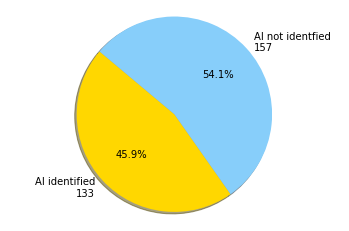

In [19]:
treatment_statistics(treatment)

In [20]:
# 1 scenario, avevano solo il voto (quante volte hanno cambiato il voto perche hanno visto il voto della macchina)
# 2 scenario, avevano voto piu scenario (quante volte hanno cambiato il voto perche hanno visto il nome della macchina)
# 3 scenario, avevano solo lo scenario (vedo per ogni voto se e diverso, o uguale a quella della macchina, se il ragionamento macchina e umano hanno portato allo stesso risultato)

#### 1_SCENARIO: ONLY THE MARK

In [21]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)
    recon = 0
    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        if(recon == 1):
            axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        else:
            axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color, hatch='//'))
            
        cum_size += row_data
        recon += 1

    if category_labels:
        plt.xticks(ind, category_labels, fontsize=15, rotation=20, ha='right')

    if y_label:
        plt.ylabel(y_label, fontsize=15)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center", fontsize=15, weight='bold')

def treatment_statistic(treatment):
    not_same_to_prediction_1 = 0
    not_same_to_journalist_1 = 0
    same_to_journalist_1 = 0
    same_to_prediction_1 = 0 
    for el in treatment.values:
        if(len(el[2]) == 142):
            if(float(el[3]) != float(el[6])):
                not_same_to_prediction_1 += 1
            else:
                same_to_prediction_1 += 1
            if(float(el[4]) != float(el[6])):
                not_same_to_prediction_1 += 1
            else:
                same_to_prediction_1 += 1
            if(float(el[5]) != float(el[6])):
                not_same_to_prediction_1 += 1
            else:
                same_to_prediction_1 += 1
            if(float(el[3]) != float(el[7])):
                not_same_to_journalist_1 += 1
            else:
                same_to_journalist_1 += 1
            if(float(el[4]) != float(el[7])):
                not_same_to_journalist_1 += 1
            else:
                same_to_journalist_1 += 1
            if(float(el[5]) != float(el[7])):
                not_same_to_journalist_1 += 1
            else:
                same_to_journalist_1 += 1
    not_same_to_prediction_perc_1 = percentage(not_same_to_prediction_1, not_same_to_prediction_1+same_to_prediction_1)
    same_to_prediction_perc_1 = percentage(same_to_prediction_1, not_same_to_prediction_1+same_to_prediction_1)
    
    not_same_to_journalist_perc_1 = percentage(not_same_to_journalist_1, not_same_to_journalist_1+same_to_journalist_1)
    same_to_journalist_perc_1 = percentage(same_to_journalist_1, not_same_to_journalist_1 + same_to_journalist_1)
    
    not_same_to_prediction_2 = 0
    not_same_to_journalist_2 = 0
    same_to_journalist_2 = 0
    same_to_prediction_2 = 0 
    for el in treatment.values:
        tokens = el[2].split()
        if(len(el[2]) >= 142 and tokens[0] != 'Informazioni'):
            if(float(el[3]) != float(el[6])):
                not_same_to_prediction_2 += 1
            else:
                same_to_prediction_2 += 1
            if(float(el[4]) != float(el[6])):
                not_same_to_prediction_2 += 1
            else:
                same_to_prediction_2 += 1
            if(float(el[5]) != float(el[6])):
                not_same_to_prediction_2 += 1
            else:
                same_to_prediction_2 += 1
            if(float(el[3]) != float(el[7])):
                not_same_to_journalist_2 += 1
            else:
                same_to_journalist_2 += 1
            if(float(el[4]) != float(el[7])):
                not_same_to_journalist_2 += 1
            else:
                same_to_journalist_2 += 1
            if(float(el[5]) != float(el[7])):
                not_same_to_journalist_2 += 1
            else:
                same_to_journalist_2 += 1
    not_same_to_prediction_2_perc = percentage(not_same_to_prediction_2, not_same_to_prediction_2+same_to_prediction_2)
    same_to_prediction_2_perc = percentage(same_to_prediction_2, not_same_to_prediction_2+same_to_prediction_2)
    
    not_same_to_journalist_2_perc = percentage(not_same_to_journalist_2, not_same_to_journalist_2+same_to_journalist_2)
    same_to_journalist_2_perc = percentage(same_to_journalist_2, not_same_to_journalist_2 + same_to_journalist_2)
    
    not_same_to_prediction_3 = 0
    not_same_to_journalist_3 = 0
    same_to_journalist_3 = 0
    same_to_prediction_3 = 0 
    for el in treatment.values:
        tokens = el[2].split()
        if(len(el[2]) >= 142 and tokens[0] == 'Informazioni'):
            if(float(el[3]) != float(el[6])):
                not_same_to_prediction_3 += 1
            else:
                same_to_prediction_3 += 1
            if(float(el[4]) != float(el[6])):
                not_same_to_prediction_3 += 1
            else:
                same_to_prediction_3 += 1
            if(float(el[5]) != float(el[6])):
                not_same_to_prediction_3 += 1
            else:
                same_to_prediction_3 += 1
            if(float(el[3]) != float(el[7])):
                not_same_to_journalist_3 += 1
            else:
                same_to_journalist_3 += 1
            if(float(el[4]) != float(el[7])):
                not_same_to_journalist_3 += 1
            else:
                same_to_journalist_3 += 1
            if(float(el[5]) != float(el[7])):
                not_same_to_journalist_3 += 1
            else:
                same_to_journalist_3 += 1
    not_same_to_prediction_3_perc = percentage(not_same_to_prediction_3, not_same_to_prediction_3+same_to_prediction_3)
    same_to_prediction_3_perc = percentage(same_to_prediction_3, not_same_to_prediction_3+same_to_prediction_3)
    
    not_same_to_journalist_3_perc = percentage(not_same_to_journalist_3, not_same_to_journalist_3+same_to_journalist_3)
    same_to_journalist_3_perc = percentage(same_to_journalist_3, not_same_to_journalist_3 + same_to_journalist_3)
    
    
    data = [
    [same_to_prediction_perc_1, same_to_prediction_2_perc, same_to_prediction_3_perc],
    [not_same_to_prediction_perc_1, not_same_to_prediction_2_perc, not_same_to_prediction_3_perc]]
    
    series_labels = ['Same Rating', 'Different Rating']
    category_labels = ['Rating Only', 'Ratings + Explanation', 'Explanation Only']
    
    plt.figure(figsize=(6,6))
    
    plot_stacked_bar(
        data, 
        series_labels, 
        category_labels=category_labels, 
        show_values=True, 
        value_format="{:.1f}",
        colors=['tab:orange', 'tab:blue'],
        y_label="Difference between A.I. and Human"
    )
    plt.axhline(y=50,color='red', label='50%')
    #plt.title('First Scenario, Human Evaluation Knowing only AI Prediction')
    plt.xlabel('Scenario', fontsize=20)
    plt.yticks([0,20,40,60,80,100], fontsize=15)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fontsize=13)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig('img/treatment_results.pdf')
    plt.show()

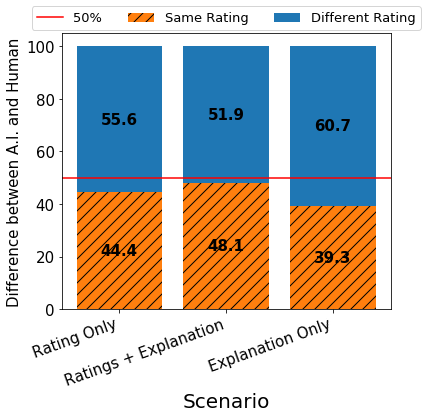

In [22]:
treatment_statistic(treatment)

In [23]:
def extract_stdv_and_mean(listvalues, listnumbers):
    '''
    '''
    reconfiguredvalues = []
    for i in range(0, len(listvalues)):
        reconfiguredvalues.append(percentage(listvalues[i], listnumbers[i]))
    return round(statistics.stdev(reconfiguredvalues),2), round(statistics.mean(reconfiguredvalues),2)
    
def table_for_scenario_for_participant_and_match(treatment):
    '''
    return a dataframe in which for total and then for each scenario,
    compute the mean and std per participant and per match
    
    Param:
        treatment df
    Return 
        results df
    '''
    #total part
    tot = {}
    tot['agree part'] = []
    tot['agree match'] = []
    tot['tot num part'] = []
    tot['tot num match'] = []
    #first total computation for participant
    for p in ['pool_1', 'pool_2', 'pool_3', 'pool_4']:
        sub = treatment[treatment['pool'] == p]
        for participant in [1,2,3]:
            agree = 0
            tots = 0
            accessor = 'res_' + str(participant)
            for i, el in sub.iterrows():
                if(el[accessor] == el['prediction']):
                    agree += 1
                tots += 1
            tot['agree part'].append(agree)
            tot['tot num part'].append(tots)
    for p in range(1,11):
        sub = treatment[treatment['match'] == p]
        agree = 0
        tots = 0
        for i, el in sub.iterrows():
                if(el['res_1'] == el['prediction']):
                    agree += 1
                if(el['res_2'] == el['prediction']):
                    agree += 1
                if(el['res_3'] == el['prediction']):
                    agree += 1
                tots += 1
        tot['agree match'].append(agree) 
        tot['tot num match'].append(tots * 3)
    #scenarios
    scen1 = {}
    scen2 = {}
    scen3 = {}
    scen1['agree part'] = []
    scen1['agree match'] = []
    scen2['agree part'] = []
    scen2['agree match'] = []
    scen3['agree part'] = []
    scen3['agree match'] = []
    scen1['total num part'] = []
    scen2['total num part'] = []
    scen3['total num part'] = []
    scen1['total num match'] = []
    scen2['total num match'] = []
    scen3['total num match'] = []
    #first total computation for participant
    for p in ['pool_1', 'pool_2', 'pool_3', 'pool_4']:
        sub = treatment[treatment['pool'] == p]
        for participant in [1,2,3]:
            agree1 = 0
            agree2 = 0
            agree3 = 0
            tot1 = 0
            tot2 =0
            tot3 =0
            accessor = 'res_' + str(participant)
            for i, el in sub.iterrows():
                if(len(el['scenarios']) == 142):
                    tot1 += 1
                if(len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    tot2 += 1
                if(len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    tot3 += 1               
                #first scenario
                if(el[accessor] == el['prediction'] and len(el['scenarios']) == 142):
                    agree1 += 1
                #second scenario
                if(el[accessor] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    agree2 += 1
                #third scenario
                if(el[accessor] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    agree3 += 1
                
            scen1['agree part'].append(agree1)
            scen2['agree part'].append(agree2)
            scen3['agree part'].append(agree3)
            scen1['total num part'].append(tot1)
            scen2['total num part'].append(tot2)
            scen3['total num part'].append(tot3)
    for p in range(1,11):
        sub = treatment[treatment['match'] == p]
        agree1 = 0
        agree2 = 0
        agree3 = 0
        tot1 = 0
        tot2 = 0
        tot3 = 0
        for i, el in sub.iterrows():
                if(len(el['scenarios']) == 142):
                    tot1 += 1
                if(len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    tot2 += 1
                if(len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    tot3 += 1               
                #first scenario
                if(el['res_1'] == el['prediction'] and len(el['scenarios']) == 142):
                    agree1 += 1
                #second scenario
                if(el['res_1'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    agree2 += 1
                #third scenario
                if(el['res_1'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    agree3 += 1
                 #first scenario
                if(el['res_2'] == el['prediction'] and len(el['scenarios']) == 142):
                    agree1 += 1
                #second scenario
                if(el['res_2'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    agree2 += 1
                #third scenario
                if(el['res_2'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    agree3 += 1
                 #first scenario
                if(el['res_3'] == el['prediction'] and len(el['scenarios']) == 142):
                    agree1 += 1
                #second scenario
                if(el['res_3'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    agree2 += 1
                #third scenario
                if(el['res_3'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    agree3 += 1
        scen1['agree match'].append(agree1)
        scen2['agree match'].append(agree2)
        scen3['agree match'].append(agree3)
        scen1['total num match'].append(tot1 * 3)
        scen2['total num match'].append(tot2 * 3)
        scen3['total num match'].append(tot3 * 3)
        
    print(tot)
            
    listxaxis = ['total', 'total', 'only ratings', 'only ratings', 'ratings + explanations', 'ratings + explanations', 'only explanations', 'only explanations']
    listyaxis = ['participant', 'match', 'participant', 'match','participant', 'match','participant', 'match']
    stparttot, meanparttot = extract_stdv_and_mean(tot['agree part'], tot['tot num part'])
    stmattot, meanmattot = extract_stdv_and_mean(tot['agree match'], tot['tot num match'])
    stpartscen1, meanpartscen1 = extract_stdv_and_mean(scen1['agree part'], scen1['total num part'])
    stmatscen1, meanmatscen1 = extract_stdv_and_mean(scen1['agree match'], scen1['total num match'])
    stpartscen2, meanpartscen2 = extract_stdv_and_mean(scen2['agree part'], scen2['total num part'])
    stmatscen2, meanmatscen2 = extract_stdv_and_mean(scen2['agree match'], scen2['total num match'])
    stpartscen3, meanpartscen3 = extract_stdv_and_mean(scen3['agree part'], scen3['total num part'])
    stmatscen3, meanmatscen3 = extract_stdv_and_mean(scen3['agree match'], scen3['total num match'])
    
    listmean = [meanparttot, meanmattot, meanpartscen1, meanmatscen1, meanpartscen2, meanmatscen2, meanpartscen3, meanmatscen3]
    liststdv = [stparttot, stmattot, stpartscen1, stmatscen1, stpartscen2, stmatscen2, stpartscen3, stmatscen3]
    
    mean_and_std_treatment = pd.DataFrame()
    mean_and_std_treatment['scenario'] = listxaxis
    mean_and_std_treatment['perspective'] = listyaxis
    mean_and_std_treatment['mean (Perc)'] = listmean
    mean_and_std_treatment['std (Perc)'] = liststdv
    
    return mean_and_std_treatment

In [24]:
res = table_for_scenario_for_participant_and_match(treatment)

{'agree part': [14, 11, 16, 14, 15, 26, 11, 7, 10, 4, 5, 4], 'agree match': [16, 13, 12, 20, 17, 18, 10, 7, 11, 13], 'tot num part': [30, 30, 30, 30, 30, 30, 30, 30, 30, 10, 10, 10], 'tot num match': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}


In [25]:
print(res.to_latex())

\begin{tabular}{lllrr}
\toprule
{} &                scenario &  perspective &  mean (Perc) &  std (Perc) \\
\midrule
0 &                   total &  participant &        45.28 &       15.53 \\
1 &                   total &        match &        45.67 &       13.34 \\
2 &            only ratings &  participant &        44.44 &       22.72 \\
3 &            only ratings &        match &        43.06 &       17.33 \\
4 &  ratings + explanations &  participant &        47.71 &       17.16 \\
5 &  ratings + explanations &        match &        47.78 &       13.30 \\
6 &       only explanations &  participant &        38.96 &       17.11 \\
7 &       only explanations &        match &        42.83 &       18.86 \\
\bottomrule
\end{tabular}



In [26]:
def extract_list_of_values_for_scenario(treatment):
    '''
    This function extract the results obtained from artifical and human judge creating a list of votes for each scenario
    
    Params:
        treatment dataframe 
    
    Return two list of lists:
        list_artificial : a list containing the list of ratings of the 3 different scenarios (predicted evaluation)
        list_human: a list containing the list of ratings of the 3 different scenarios (human evaluation)
    '''
    
    list_artificial = []
    list_human = []
    
    list_artificial_scen_1 = []
    list_human_scen_1 = []
    
    list_artificial_scen_2 = []
    list_human_scen_2 = []
    
    list_artificial_scen_3 = []
    list_human_scen_3 = []
    
    #for each scenario
    for el in treatment.values:
        tokens = el[2].split()
        
        if(len(el[2]) == 142):
            list_human_scen_1.append(el[3])
            list_human_scen_1.append(el[4])
            list_human_scen_1.append(el[5])
            list_artificial_scen_1.append(el[6])
            list_artificial_scen_1.append(el[6])
            list_artificial_scen_1.append(el[6])
        
        if(len(el[2]) >= 142 and tokens[0] != 'Informazioni'):
            list_human_scen_2.append(el[3])
            list_human_scen_2.append(el[4])
            list_human_scen_2.append(el[5])
            list_artificial_scen_2.append(el[6])
            list_artificial_scen_2.append(el[6])
            list_artificial_scen_2.append(el[6])
            
        if(len(el[2]) >= 142 and tokens[0] == 'Informazioni'):
            list_human_scen_3.append(el[3])
            list_human_scen_3.append(el[4])
            list_human_scen_3.append(el[5])
            list_artificial_scen_3.append(el[6])
            list_artificial_scen_3.append(el[6])
            list_artificial_scen_3.append(el[6])
    list_artificial.append(list_artificial_scen_1)
    list_human.append(list_human_scen_1)
    list_artificial.append(list_artificial_scen_2)
    list_human.append(list_human_scen_2)
    list_artificial.append(list_artificial_scen_3)
    list_human.append(list_human_scen_3)
    
    return list_human, list_artificial
    

In [27]:
l_h, l_a = extract_list_of_values_for_scenario(treatment)

working with index of l_h and l_a change the scenario we want to analyze

0.8452380952380952


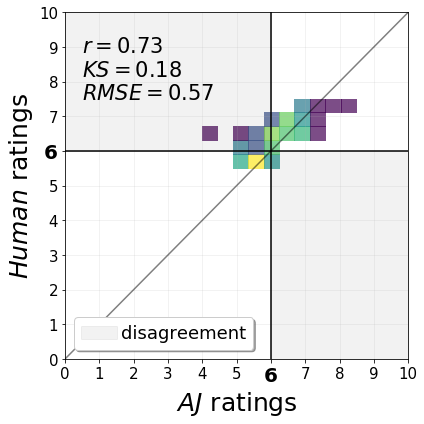

In [28]:
pa.correlation_newspapers(l_h[2], l_a[2], 'artificial', 'human', 'Explanation Only')

# ANOVA AND TUKEY TEST

## RECOGNITION TEST

**ANOVA AND TUKEY BY ROLES**

In [41]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


#i gruppi per recognition sono i ruoli
ruoli = []
l = []
#devo creare un dataframe con ogni colonna un partecipante
for el in turing.values:
    if(el[1].split()[-1].replace(')', '') == 'Attaccante'):
        ruoli.append('A')
        l.append(el[7])
        ruoli.append('A')
        l.append(el[6])
        ruoli.append('A')
        l.append(el[5])
    if(el[1].split()[-1].replace(')', '') == 'Centrocampista'):
        ruoli.append('C')
        l.append(el[7])
        ruoli.append('C')
        l.append(el[6])
        ruoli.append('C')
        l.append(el[5])
    if(el[1].split()[-1].replace(')', '') == 'Difensore'):
        ruoli.append('D')
        l.append(el[7])
        ruoli.append('D')
        l.append(el[6])
        ruoli.append('D')
        l.append(el[5])
    if(el[1].split()[-1].replace(')', '') == 'Portiere'):
        ruoli.append('P')
        l.append(el[7])
        ruoli.append('P')
        l.append(el[6])
        ruoli.append('P')
        l.append(el[5])
        
statistical_testing_rec = pd.DataFrame()
statistical_testing_rec['role'] = ruoli
statistical_testing_rec['ratings'] = l
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(statistical_testing_rec[statistical_testing_rec['role'] == 'A']['ratings'] ,
                                statistical_testing_rec[statistical_testing_rec['role'] == 'C']['ratings'], 
                                statistical_testing_rec[statistical_testing_rec['role'] == 'D']['ratings'],
                               statistical_testing_rec[statistical_testing_rec['role'] == 'P']['ratings'])

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")
print('\n')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=statistical_testing_rec['ratings'], groups=statistical_testing_rec['role'], alpha=0.05)
print(m_comp)

Results of ANOVA test:
 The F-statistic is: 0.7887920705850753
 The p-value is: 0.5014349263961917


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      C  -0.0219    0.9 -0.4231 0.3792  False
     A      D   -0.141 0.7203 -0.5035 0.2216  False
     A      P   0.2281 0.8477 -0.5297 0.9858  False
     C      D   -0.119 0.8157 -0.4875 0.2494  False
     C      P     0.25 0.8076 -0.5106 1.0106  False
     D      P    0.369 0.5619 -0.3719   1.11  False
---------------------------------------------------


We fail to reject the null hypothesis that mean ratings is equal across all roles.

**ANOVA AND TUKEY BY PARTICIPANTS**

In [31]:
fvalue, pvalue = stats.f_oneway(turing[turing['pool'] == 'pool_1']['response_1'],
                               turing[turing['pool'] == 'pool_1']['response_2'],
                               turing[turing['pool'] == 'pool_1']['response_3'],
                                turing[turing['pool'] == 'pool_2']['response_1'],
                               turing[turing['pool'] == 'pool_2']['response_2'],
                               turing[turing['pool'] == 'pool_2']['response_3'],
                                turing[turing['pool'] == 'pool_3']['response_1'],
                               turing[turing['pool'] == 'pool_3']['response_2'],
                               turing[turing['pool'] == 'pool_3']['response_3'],
                                turing[turing['pool'] == 'pool_4']['response_1'],
                               turing[turing['pool'] == 'pool_4']['response_2'],
                               turing[turing['pool'] == 'pool_4']['response_3']
                               )

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

part = []
ratings = []
for el in turing.values:
    if(el[0] == 'pool_1'):
        part.append(1)
        ratings.append(el[5])
        part.append(2)
        ratings.append(el[6])
        part.append(3)
        ratings.append(el[7])
    if(el[0] == 'pool_2'):
        part.append(4)
        ratings.append(el[5])
        part.append(5)
        ratings.append(el[6])
        part.append(6)
        ratings.append(el[7])
    if(el[0] == 'pool_3'):
        part.append(7)
        ratings.append(el[5])
        part.append(8)
        ratings.append(el[6])
        part.append(9)
        ratings.append(el[7])
    if(el[0] == 'pool_4'):
        part.append(10)
        ratings.append(el[5])
        part.append(11)
        ratings.append(el[6])
        part.append(12)
        ratings.append(el[7])
    
statistical_participant_recognition = pd.DataFrame()
statistical_participant_recognition['participant'] = part
statistical_participant_recognition['ratings'] = ratings



print('\n')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=statistical_participant_recognition['ratings'], groups=statistical_participant_recognition['participant'], alpha=0.05)
print(m_comp)

Results of ANOVA test:
 The F-statistic is: 0.49791841495507927
 The p-value is: 0.9030476832000541


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.1316   0.9 -0.7545 1.0177  False
     1      3  -0.1053   0.9 -0.9914 0.7809  False
     1      4   0.0313   0.9 -0.8334 0.8961  False
     1      5   0.1028   0.9  -0.762 0.9675  False
     1      6   0.0075   0.9 -0.8572 0.8723  False
     1      7  -0.2211   0.9  -1.096 0.6539  False
     1      8  -0.1961   0.9  -1.071 0.6789  False
     1      9  -0.2461   0.9  -1.121 0.6289  False
     1     10   0.1414   0.9 -1.0097 1.2926  False
     1     11   0.0789   0.9 -1.0722 1.2301  False
     1     12   0.0789   0.9 -1.0722 1.2301  False
     2      3  -0.2368   0.9  -1.123 0.6493  False
     2      4  -0.1003   0.9  -0.965 0.7645  False
     2      5  -0.0288   0.9 -0.8936 0.8359  False
     2      6  -0.1241   0.9 -

We fail to reject the null hypothesis that mean ratings is equal across all participants.

**ANOVA AND TUKEY TEST BY POOL**

In [43]:
pool = []
ratings = []
for el in turing.values:
    pool.append(el[0])
    ratings.append(el[5])
    pool.append(el[0])
    ratings.append(el[6])
    pool.append(el[0])
    ratings.append(el[7])
    
statistics_pool_recognition = pd.DataFrame()
statistics_pool_recognition['pool'] = pool
statistics_pool_recognition['ratings'] = ratings
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(statistics_pool_recognition[statistics_pool_recognition['pool'] == 'pool_1']['ratings'],
                                statistics_pool_recognition[statistics_pool_recognition['pool'] == 'pool_2']['ratings'],
                                statistics_pool_recognition[statistics_pool_recognition['pool'] == 'pool_3']['ratings'],
                                statistics_pool_recognition[statistics_pool_recognition['pool'] == 'pool_4']['ratings']
                               )

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")
print('\n')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=statistics_pool_recognition['ratings'], groups=statistics_pool_recognition['pool'], alpha=0.05)
print(m_comp)

Results of ANOVA test:
 The F-statistic is: 1.5450491725157924
 The p-value is: 0.20408648837440274


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
pool_1 pool_2   0.0384    0.9 -0.3456 0.4225  False
pool_1 pool_3  -0.2298 0.4215 -0.6184 0.1587  False
pool_1 pool_4    0.091    0.9 -0.4202 0.6022  False
pool_2 pool_3  -0.2683 0.2606 -0.6472 0.1107  False
pool_2 pool_4   0.0526    0.9 -0.4514 0.5565  False
pool_3 pool_4   0.3208 0.3602 -0.1866 0.8282  False
---------------------------------------------------


We fail to reject the null hypothesis that mean ratings is equal across all pools.

## TREATMENT

**ANOVA TEST BY ROLE IN TREATMENT**

In [33]:
#i gruppi per recognition sono i ruoli
ruoli = []
l = []
#devo creare un dataframe con ogni colonna un partecipante
for el in treatment.values:
    if(el[1].split()[-1].replace(')', '') == 'Attaccante'):
        ruoli.append('A')
        l.append(el[3])
        ruoli.append('A')
        l.append(el[4])
        ruoli.append('A')
        l.append(el[5])
    if(el[1].split()[-1].replace(')', '') == 'Centrocampista'):
        ruoli.append('C')
        l.append(el[3])
        ruoli.append('C')
        l.append(el[4])
        ruoli.append('C')
        l.append(el[5])
    if(el[1].split()[-1].replace(')', '') == 'Difensore'):
        ruoli.append('D')
        l.append(el[3])
        ruoli.append('D')
        l.append(el[4])
        ruoli.append('D')
        l.append(el[5])
    if(el[1].split()[-1].replace(')', '') == 'Portiere'):
        ruoli.append('P')
        l.append(el[3])
        ruoli.append('P')
        l.append(el[4])
        ruoli.append('P')
        l.append(el[5])
        
statistical_testing_tre = pd.DataFrame()
statistical_testing_tre['role'] = ruoli
statistical_testing_tre['ratings'] = l

# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(statistical_testing_tre[statistical_testing_tre['role'] == 'A']['ratings'] ,
                                statistical_testing_tre[statistical_testing_tre['role'] == 'C']['ratings'], 
                                statistical_testing_tre[statistical_testing_tre['role'] == 'D']['ratings'],
                               statistical_testing_tre[statistical_testing_tre['role'] == 'P']['ratings'])

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

print('\n')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=statistical_testing_tre['ratings'], groups=statistical_testing_tre['role'], alpha=0.05)
print(m_comp)

Results of ANOVA test:
 The F-statistic is: 0.6585780742225855
 The p-value is: 0.5781362207606928


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      C  -0.1324 0.6945 -0.4573 0.1925  False
     A      D  -0.1604 0.5831 -0.4915 0.1706  False
     A      P  -0.0521    0.9 -0.4344 0.3302  False
     C      D   -0.028    0.9 -0.2907 0.2347  False
     C      P   0.0803    0.9 -0.2445 0.4052  False
     D      P   0.1083 0.8109 -0.2227 0.4394  False
---------------------------------------------------


We fail to reject the null hypothesis that mean ratings is equal across all roles.

**ANOVA AND TUKEY TEST BY PARTICIPANT IN TREATMENT**

In [34]:
fvalue, pvalue = stats.f_oneway(treatment[treatment['pool'] == 'pool_1']['res_1'],
                               treatment[treatment['pool'] == 'pool_1']['res_2'],
                               treatment[treatment['pool'] == 'pool_1']['res_3'],
                                treatment[treatment['pool'] == 'pool_2']['res_1'],
                               treatment[treatment['pool'] == 'pool_2']['res_2'],
                               treatment[treatment['pool'] == 'pool_2']['res_3'],
                                treatment[treatment['pool'] == 'pool_3']['res_1'],
                               treatment[treatment['pool'] == 'pool_3']['res_2'],
                               treatment[treatment['pool'] == 'pool_3']['res_3'],
                                treatment[treatment['pool'] == 'pool_4']['res_1'],
                               treatment[treatment['pool'] == 'pool_4']['res_2'],
                               treatment[treatment['pool'] == 'pool_4']['res_3']
                               )

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")

part = []
ratings = []
for el in treatment.values:
    if(el[0] == 'pool_1'):
        part.append(1)
        ratings.append(el[3])
        part.append(2)
        ratings.append(el[4])
        part.append(3)
        ratings.append(el[5])
    if(el[0] == 'pool_2'):
        part.append(4)
        ratings.append(el[3])
        part.append(5)
        ratings.append(el[4])
        part.append(6)
        ratings.append(el[5])
    if(el[0] == 'pool_3'):
        part.append(7)
        ratings.append(el[3])
        part.append(8)
        ratings.append(el[4])
        part.append(9)
        ratings.append(el[5])
    if(el[0] == 'pool_4'):
        part.append(10)
        ratings.append(el[3])
        part.append(11)
        ratings.append(el[4])
        part.append(12)
        ratings.append(el[5])
    
statistical_participant_treatment = pd.DataFrame()
statistical_participant_treatment['participant'] = part
statistical_participant_treatment['ratings'] = ratings

print('\n')
#perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=statistical_participant_treatment['ratings'], groups=statistical_participant_treatment['participant'], alpha=0.05)
print(m_comp)

Results of ANOVA test:
 The F-statistic is: 1.4041861769556099
 The p-value is: 0.17006481334261256


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0667    0.9 -0.5444 0.6778  False
     1      3  -0.0833    0.9 -0.6944 0.5278  False
     1      4  -0.0333    0.9 -0.6444 0.5778  False
     1      5    -0.15    0.9 -0.7611 0.4611  False
     1      6  -0.0467    0.9 -0.6578 0.5644  False
     1      7  -0.1933    0.9 -0.8044 0.4178  False
     1      8     -0.3    0.9 -0.9111 0.3111  False
     1      9  -0.2333    0.9 -0.8444 0.3778  False
     1     10  -0.4667  0.805 -1.3309 0.3976  False
     1     11  -0.5167 0.6866 -1.3809 0.3476  False
     1     12  -0.5667 0.5683 -1.4309 0.2976  False
     2      3    -0.15    0.9 -0.7611 0.4611  False
     2      4     -0.1    0.9 -0.7111 0.5111  False
     2      5  -0.2167    0.9 -0.8278 0.3944  False
     2      6 

We fail to reject the null hypothesis that mean ratings is equal across all participant.

**ANOVA AND TUKEY TEST BY MATCH**

In [37]:
p = []
l = []
for m in treatment.values:
    if(m[8] == 1):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(1)
        p.append(1)
        p.append(1)
    if(m[8] == 2):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(2)
        p.append(2)
        p.append(2)
    if(m[8] == 3):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(3)
        p.append(3)
        p.append(3)
    if(m[8] == 4):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(4)
        p.append(4)
        p.append(4)
    if(m[8] == 5):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(5)
        p.append(5)
        p.append(5)
    if(m[8] == 6):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(6)
        p.append(6)
        p.append(6)
    if(m[8] == 7):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(7)
        p.append(7)
        p.append(7)
    if(m[8] == 8):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(8)
        p.append(8)
        p.append(8)
    if(m[8] == 9):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(9)
        p.append(9)
        p.append(9)
    if(m[8] == 10):
        l.append(m[3])
        l.append(m[4])
        l.append(m[5])
        p.append(10)
        p.append(10)
        p.append(10)
        
        
statistical_test_match_tre = pd.DataFrame()
statistical_test_match_tre['m'] = p
statistical_test_match_tre['ratings'] = l

fvalue, pvalue = stats.f_oneway(statistical_test_match_tre[statistical_test_match_tre['m'] == 1]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 2]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 3]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 4]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 5]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 6]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 7]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 8]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 9]['ratings'],
                                statistical_test_match_tre[statistical_test_match_tre['m'] == 10]['ratings'],
                               )


print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}") 


print('\n')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=statistical_test_match_tre['ratings'], groups=statistical_test_match_tre['m'], alpha=0.05)
print(m_comp)

Results of ANOVA test:
 The F-statistic is: 1.6899503294808609
 The p-value is: 0.0908888194538675


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      0.1    0.9 -0.4896  0.6896  False
     1      3   0.1833    0.9 -0.4063  0.7729  False
     1      4      0.0    0.9 -0.5896  0.5896  False
     1      5     0.05    0.9 -0.5396  0.6396  False
     1      6     0.02    0.9 -0.5696  0.6096  False
     1      7    -0.18    0.9 -0.7696  0.4096  False
     1      8     -0.1    0.9 -0.6896  0.4896  False
     1      9  -0.1467    0.9 -0.7363  0.4429  False
     1     10  -0.4167 0.4263 -1.0063  0.1729  False
     2      3   0.0833    0.9 -0.5063  0.6729  False
     2      4     -0.1    0.9 -0.6896  0.4896  False
     2      5    -0.05    0.9 -0.6396  0.5396  False
     2      6    -0.08    0.9 -0.6696  0.5096  False
     2      7    -0.28 0.8814 -0.8696  0.3096  Fals

We fail to reject the null hypothesis that mean ratings is equal across all matches.

**ANOVA AND TUKEY TEST BY SCENARIO IN TREATMENT**

In [44]:
#for each scenario
scen_1 = []
scen_2 = []
scen_3 = []
l = []
scen = []
for el in treatment.values:
    tokens = el[2].split()

    if(len(el[2]) == 142):
        scen_1.append(el[3])
        scen_1.append(el[4])
        scen_1.append(el[5])
        l.append(el[3])
        l.append(el[4])
        l.append(el[5])
        scen.append('scenario 1')
        scen.append('scenario 1')
        scen.append('scenario 1')
    if(len(el[2]) >= 142 and tokens[0] != 'Informazioni'):
        scen_2.append(el[3])
        scen_2.append(el[4])
        scen_2.append(el[5])
        l.append(el[3])
        l.append(el[4])
        l.append(el[5])
        scen.append('scenario 2')
        scen.append('scenario 2')
        scen.append('scenario 2')
    if(len(el[2]) >= 142 and tokens[0] == 'Informazioni'):
        scen_3.append(el[3])
        scen_3.append(el[4])
        scen_3.append(el[5])
        l.append(el[3])
        l.append(el[4])
        l.append(el[5])
        scen.append('scenario 3')
        scen.append('scenario 3')
        scen.append('scenario 3')
statitic_test_scenario_treatment = pd.DataFrame()
statitic_test_scenario_treatment['scenario'] = scen
statitic_test_scenario_treatment['ratings'] = l

fvalue, pvalue = stats.f_oneway(scen_1, scen_2, scen_3)
print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}") 

print('\n')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=statitic_test_scenario_treatment['ratings'], groups=statitic_test_scenario_treatment['scenario'], alpha=0.05)
print(m_comp)

Results of ANOVA test:
 The F-statistic is: 1.7607376351450337
 The p-value is: 0.17329237936132066


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
scenario 1 scenario 2   0.0769 0.6578 -0.1359 0.2896  False
scenario 1 scenario 3   0.2028 0.1537 -0.0545   0.46  False
scenario 2 scenario 3   0.1259 0.3648 -0.0921  0.344  False
-----------------------------------------------------------


We fail to reject the null hypothesis that mean ratings is equal across all scenarios.

**ANOVA AND TUKEY TEST BY POOL**

In [47]:
pool = []
ratings = []
for el in treatment.values:
    pool.append(el[0])
    ratings.append(el[3])
    pool.append(el[0])
    ratings.append(el[4])
    pool.append(el[0])
    ratings.append(el[5])
    
statistics_pool_treatment = pd.DataFrame()
statistics_pool_treatment['pool'] = pool
statistics_pool_treatment['ratings'] = ratings
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(statistical_participant_treatment[statistics_pool_treatment['pool'] == 'pool_1']['ratings'],
                                statistical_participant_treatment[statistics_pool_treatment['pool'] == 'pool_2']['ratings'],
                                statistical_participant_treatment[statistics_pool_treatment['pool'] == 'pool_3']['ratings'],
                                statistical_participant_treatment[statistics_pool_treatment['pool'] == 'pool_4']['ratings']
                               )

print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {pvalue}")
print('\n')
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=statistics_pool_treatment['ratings'], groups=statistics_pool_treatment['pool'], alpha=0.05)
print(m_comp)

Results of ANOVA test:
 The F-statistic is: 4.729528322120027
 The p-value is: 0.0030698180220043543


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
pool_1 pool_2  -0.0711    0.9 -0.3447  0.2025  False
pool_1 pool_3  -0.2367 0.1164 -0.5103   0.037  False
pool_1 pool_4  -0.5111 0.0041 -0.8981 -0.1242   True
pool_2 pool_3  -0.1656 0.4025 -0.4392  0.1081  False
pool_2 pool_4    -0.44 0.0186  -0.827  -0.053   True
pool_3 pool_4  -0.2744 0.2602 -0.6614  0.1125  False
----------------------------------------------------


The differences between some of the means are statistically significant